In [52]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
path = '/home/esp-shared-a/Distribution/Workshops/cli_dy_summer_school_2023/observations/surface/era5'

In [4]:
sst = xr.open_dataarray(f'{path}/era5_sst_1940_2022_1deg.nc',engine='netcdf4')

NameError: name 'sst_dec' is not defined

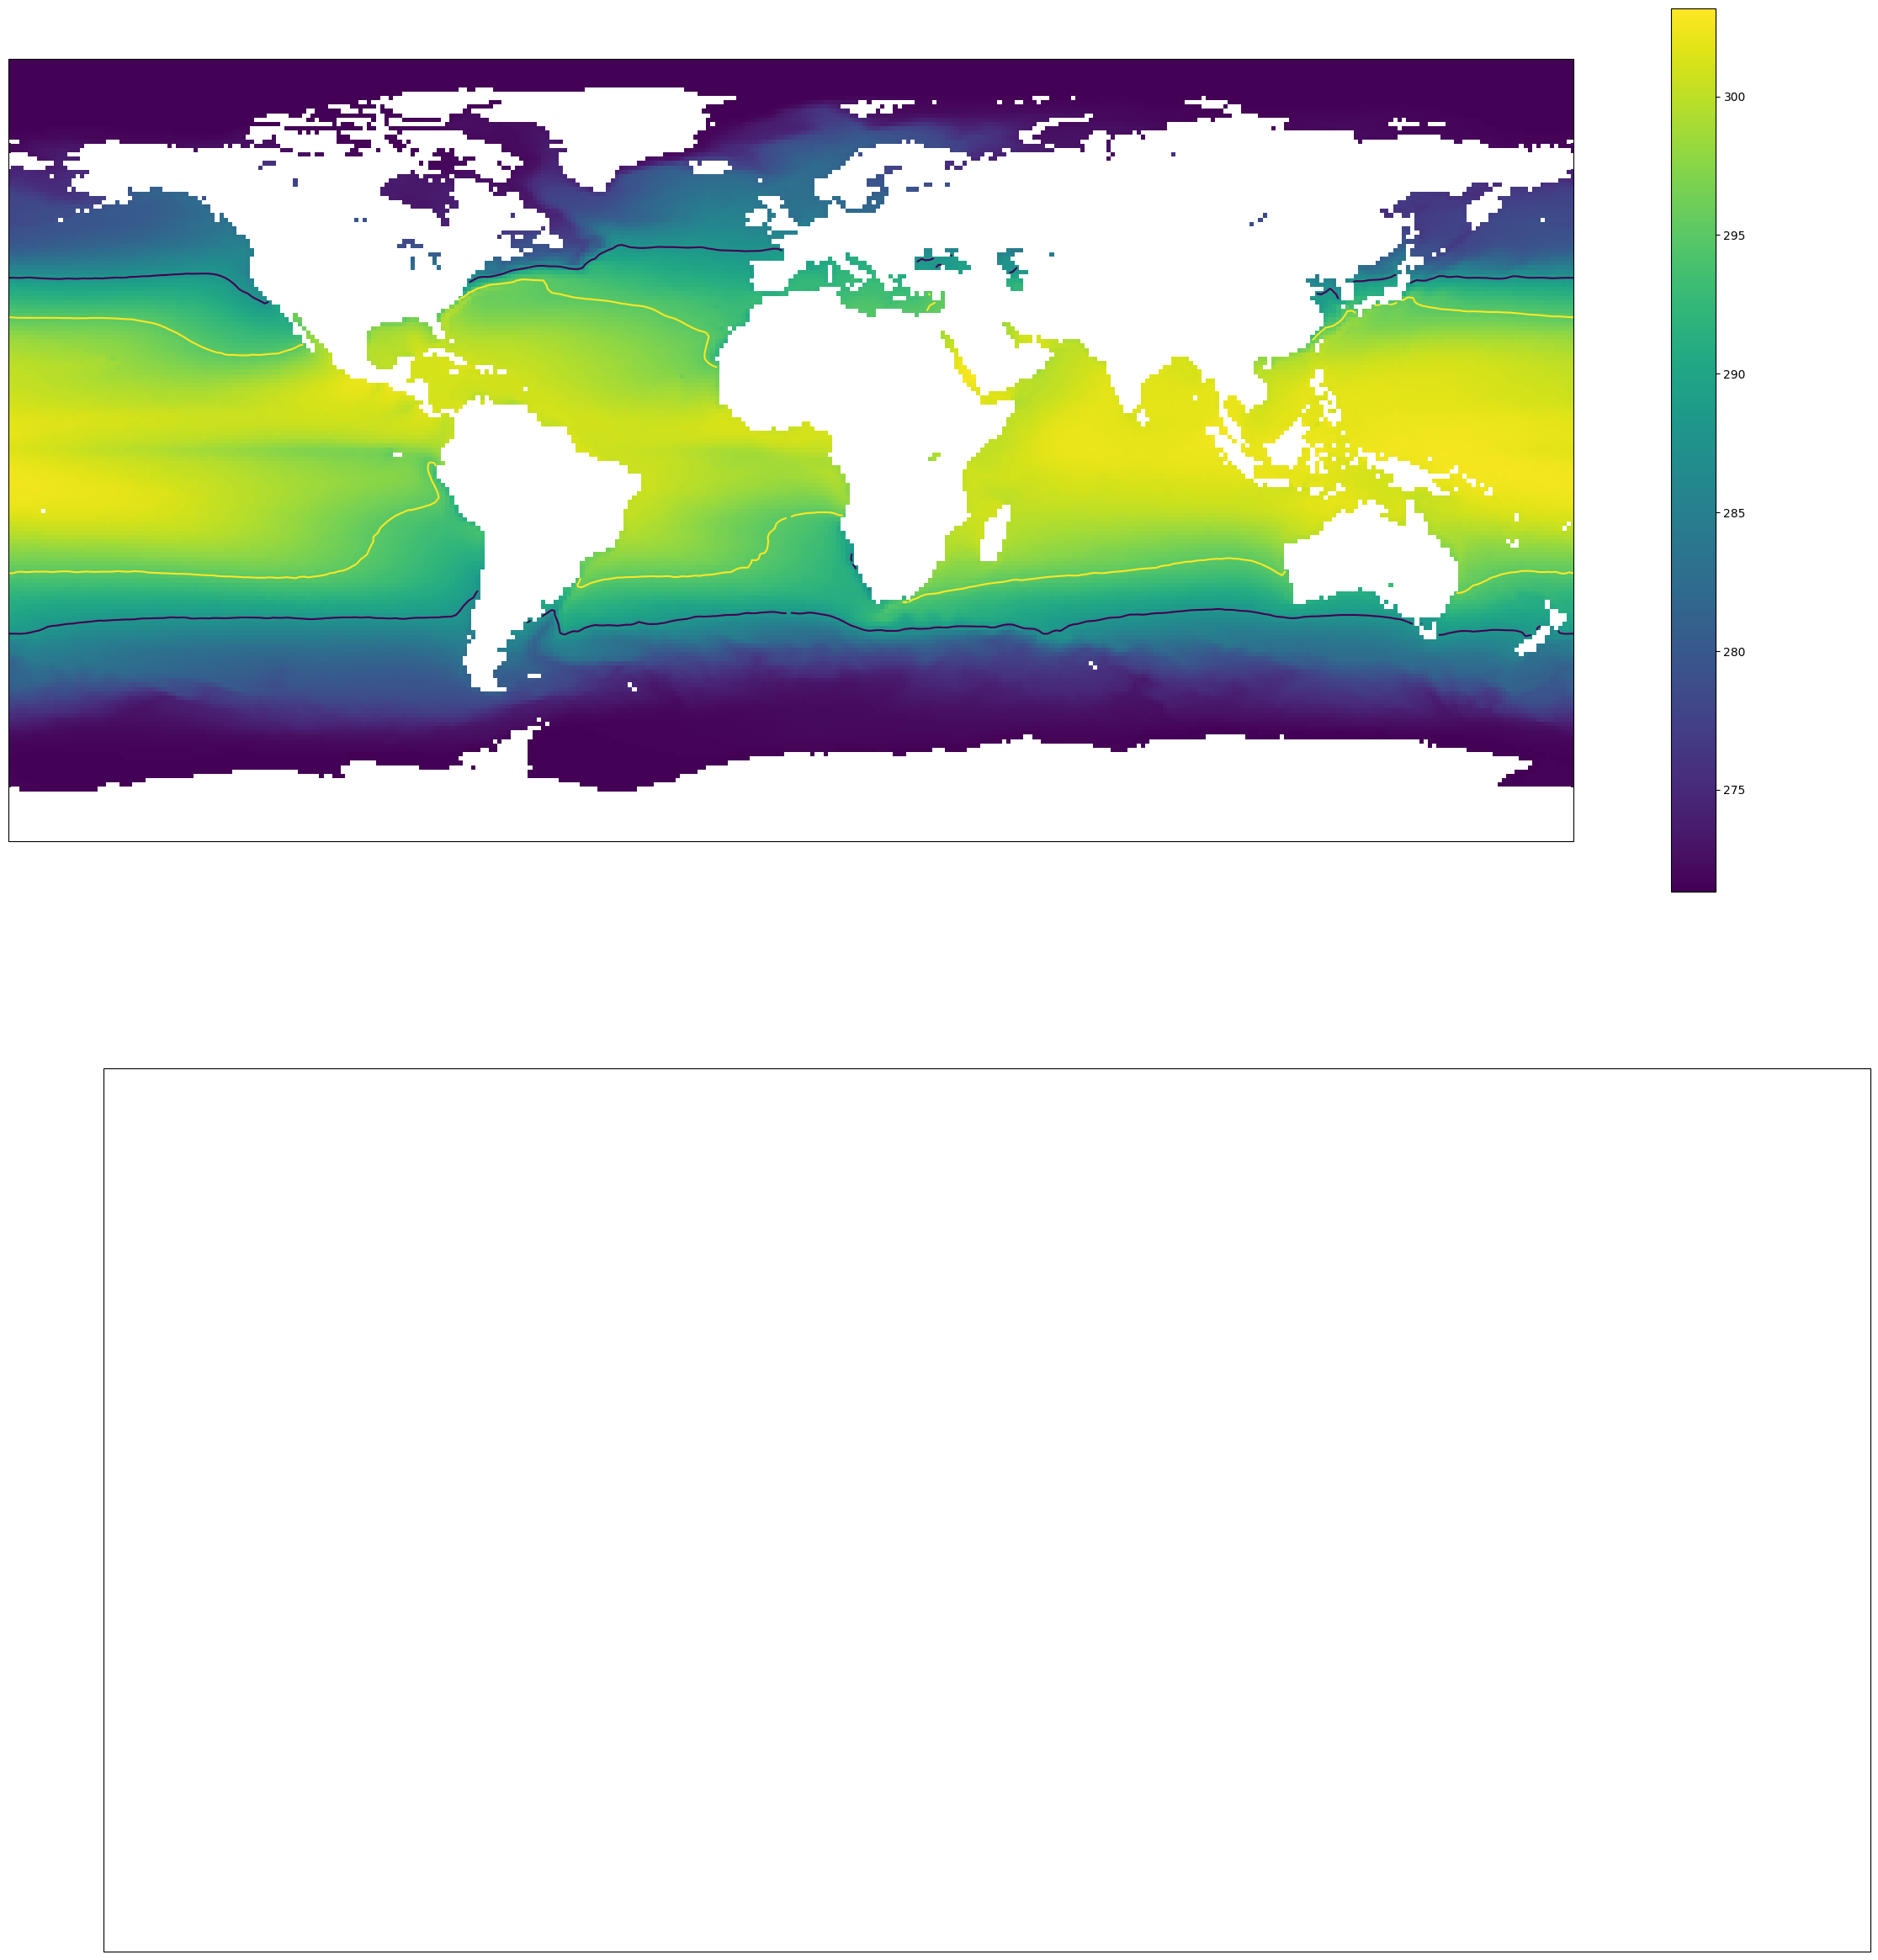

In [5]:
import cartopy.crs as ccrs
fig,ax = plt.subplots(2,figsize=(30,30),subplot_kw={'projection':ccrs.PlateCarree()})
im = ax[0].pcolormesh(sst.lon,sst.lat,sst.mean('time'))
im2 = ax[0].contour(sst.lon,sst.lat,sst.mean('time'),levels=(288,295))
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(sst.lon,sst.lat,sst_dec.mean('time'),vmin=280,vmax=295)
im2 = ax[1].contour(sst.lon,sst.lat,sst_dec.mean('time'),levels=(285,290),c='r')
plt.colorbar(im,ax=ax[1])
gl = ax[1].gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', alpha=0.5, linestyle='--', draw_labels=True)

for i in range(2):
    ax[i].set_extent((-80,-40,20,75))

In [6]:
sst_dec = sst.where(sst.time.dt.month==12,drop=True)

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [7]:
vgrad = (sst_dec.roll({'lat':1}) - sst_dec.roll({'lat':-1}))/2 

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'c'
  result = super().contour(*args, **kwargs)


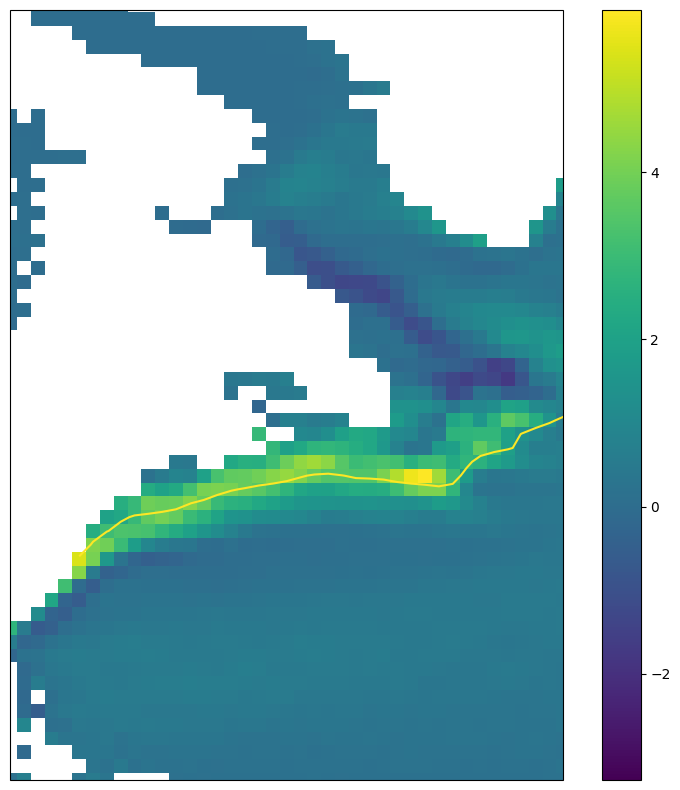

In [8]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(sst.lon,sst.lat,vgrad.mean('time'))
im2 = ax.contour(sst.lon,sst.lat,sst_dec.mean('time'),levels=(1,288),c='r')

ax.set_extent((-80,-40,20,75))
plt.colorbar(im,ax=ax)

In [9]:
# define mean vertical gradient, and find maximum within box (-75,-50,20,50)

vgrad_mean = vgrad.mean('time').sel(lat = slice(20,50), lon = slice(360-75,360-50))


In [15]:
lats_max = vgrad_mean.argmax(dim='lat')

In [36]:
sst.lat

<xarray.DataArray 'lat' (lat: 181)>
array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80., -79.,
       -78., -77., -76., -75., -74., -73., -72., -71., -70., -69., -68., -67.,
       -66., -65., -64., -63., -62., -61., -60., -59., -58., -57., -56., -55.,
       -54., -53., -52., -51., -50., -49., -48., -47., -46., -45., -44., -43.,
       -42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32., -31.,
       -30., -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,
         6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,
        18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,
        30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.])
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'c'
  result = super().contour(*args, **kwargs)


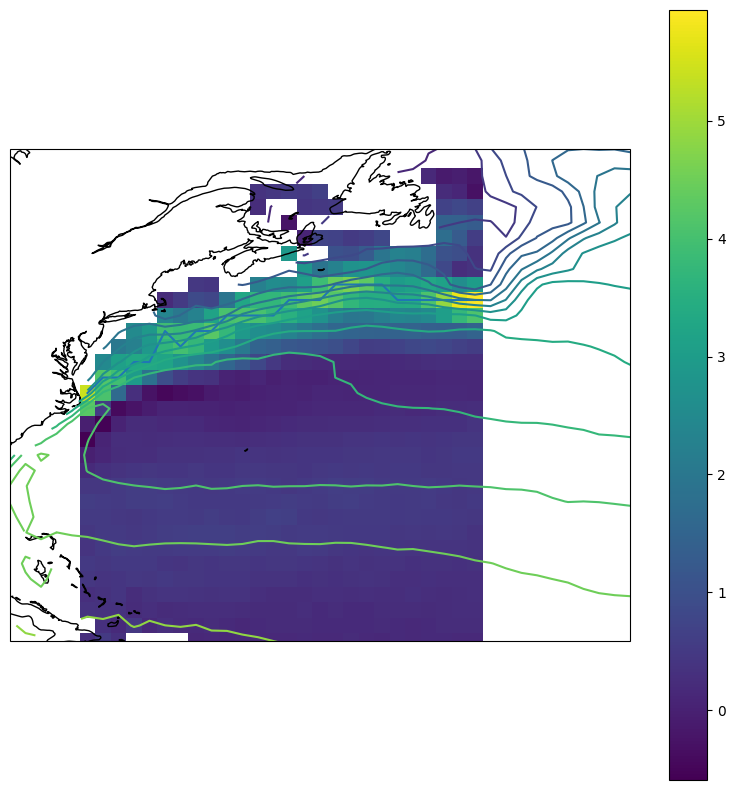

In [33]:
fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.PlateCarree()})
im = ax.pcolormesh(vgrad_mean.lon,vgrad_mean.lat,vgrad_mean)
im2 = ax.plot(vgrad_mean.lon,vgrad_mean.lat.isel(lat = lats_max),transform=ccrs.PlateCarree())
im2 = ax.contour(sst.lon,sst.lat,sst_dec.mean('time'),levels=20,c='r')
ax.set_extent((-80,-40,20,50))
ax.coastlines()
plt.colorbar(im,ax=ax)

In [62]:
def get_gs_coords(da, m):
    
    '''
    INPUTS:
    da: a dataarray containing sst on a regular grid (dimensions nx * ny)
    m: desired month for calculation
    
    OUTPUTS:
    
    gs_coords: a dataarray containing lat/lon of maximum sst meridional gradient (dimensions nx * 2)
    
    '''
    
    #da_mean = da.where(da.time.dt.month == m,drop=True).mean('time')
    da_mean = da[m]
    
    da_grad = (da_mean.roll({'lat':1}) - da_mean.roll({'lat':-1}))/2 
    
    da_grad = da_grad.sel(lat = slice(20,50), lon = slice(360-75,360-50))
    
    lats_max = da_grad.argmax(dim='lat')
    
    lats_max = da_grad.lat.isel(lat = lats_max)
    
    return lats_max
    
    

In [43]:
test = get_gs_coords(sst,12)

/home/netapp-clima/users/ggiulian/m20/lib/python3.10/site-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [44]:
test

<xarray.DataArray 'lat' (lon: 26)>
array([36., 37., 37., 38., 38., 40., 39., 40., 40., 41., 41., 41., 41., 42.,
       42., 42., 43., 43., 43., 43., 42., 42., 42., 42., 42., 42.])
Coordinates:
    lat      (lon) float64 36.0 37.0 37.0 38.0 38.0 ... 42.0 42.0 42.0 42.0 42.0
  * lon      (lon) float64 285.0 286.0 287.0 288.0 ... 307.0 308.0 309.0 310.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

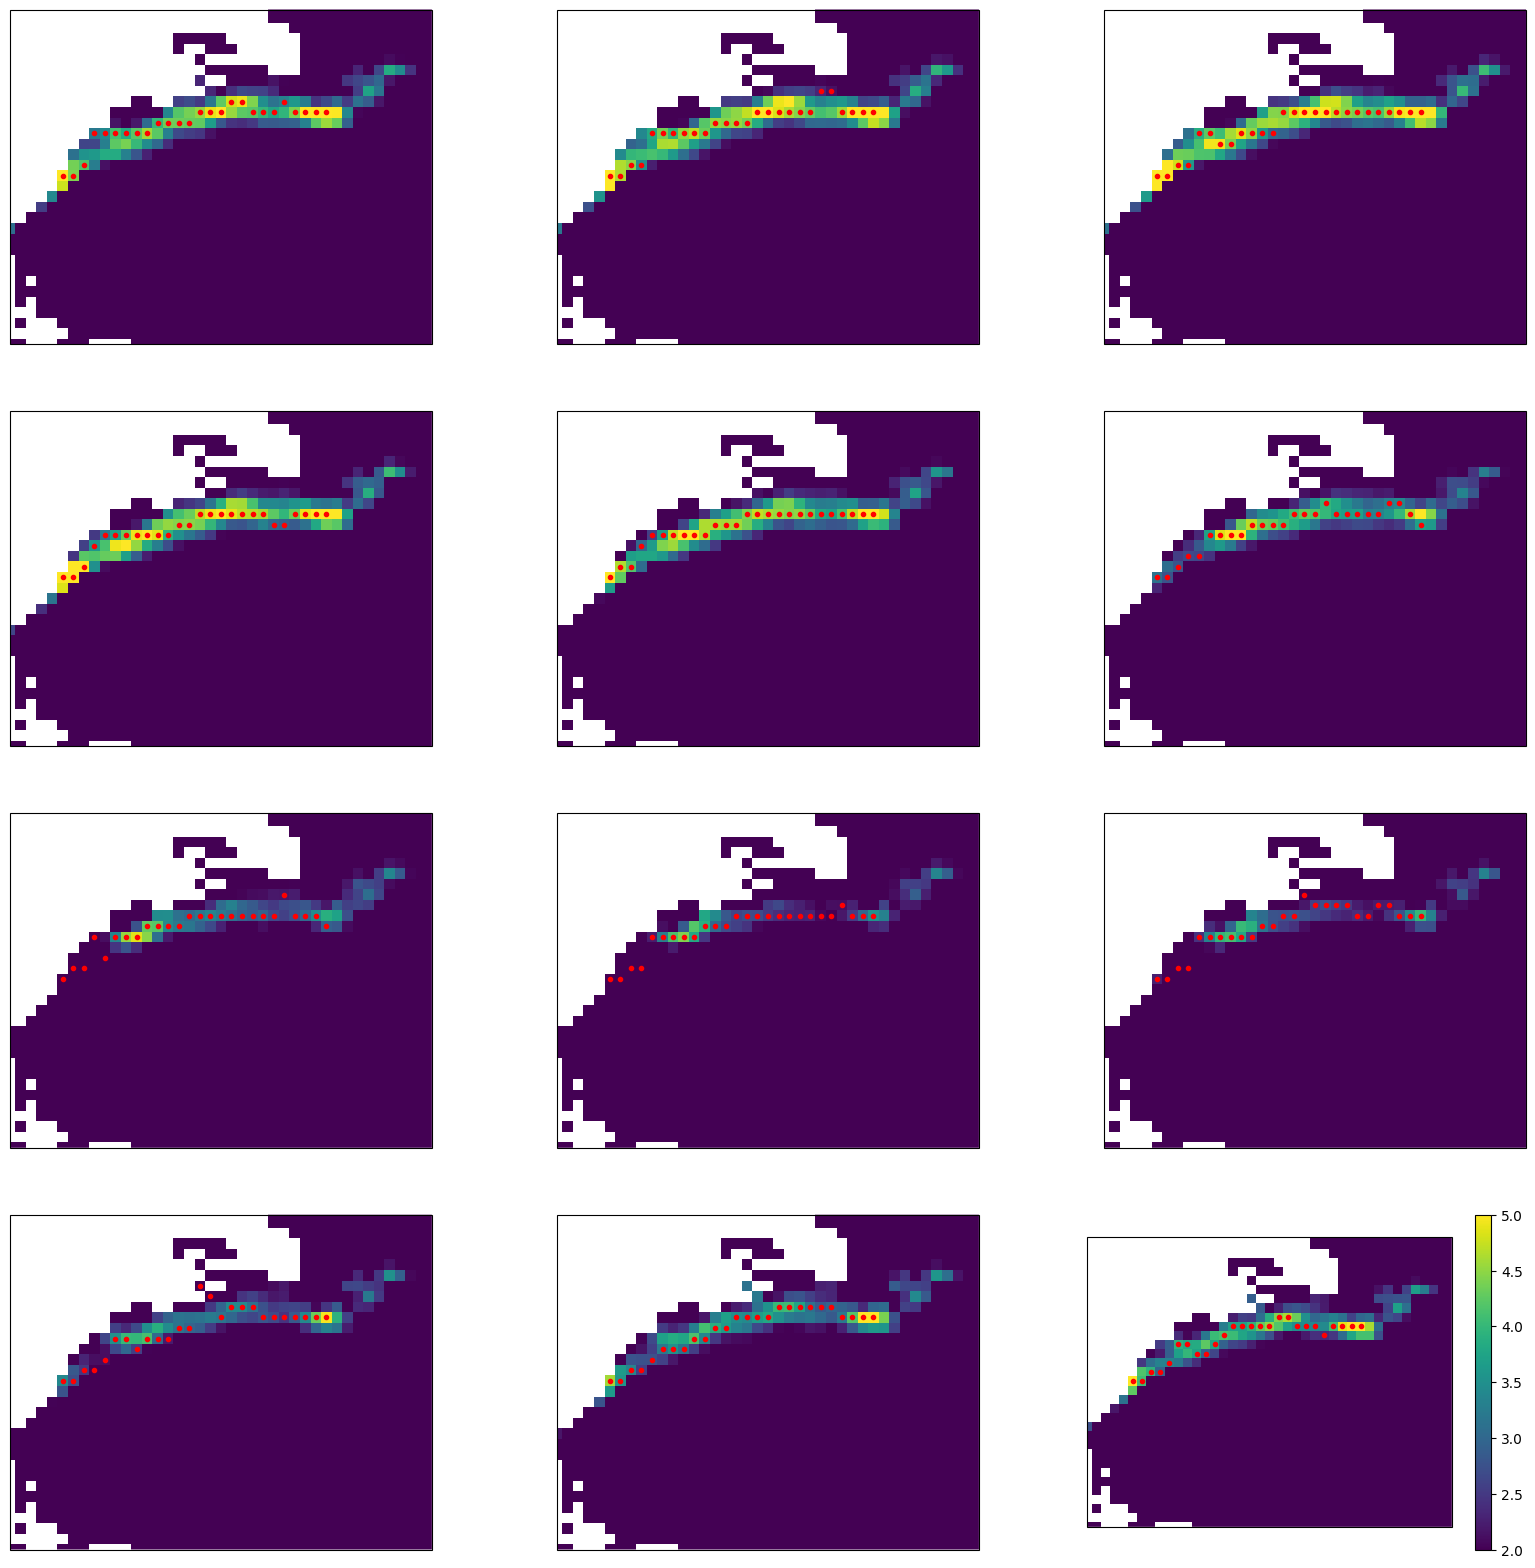

In [68]:
fig,axs = plt.subplots(4,3,figsize=(20,20),subplot_kw={'projection':ccrs.PlateCarree()})
from matplotlib import colors
norm = colors.Normalize(2,5)

for i,ax in enumerate(axs.flatten()):
    sst_grad = (sst.roll({'lat':1}) - sst.roll({'lat':-1}))/2 
    im = ax.pcolormesh(sst.lon,sst.lat,sst_grad.where(sst.time.dt.month == i+1,drop=True).mean('time'),norm=norm)
    lats_max = get_gs_coords(sst,i+1)
    ax.plot(lats_max.lon,lats_max.lat,'.r',transform=ccrs.PlateCarree())

    
    ax.set_extent((-80,-40,20,50))
plt.colorbar(im,ax=ax)

In [61]:
sst

<xarray.DataArray 'sst' (time: 996, lat: 181, lon: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.4596 , 271.4596 , ..., 271.4596 , 271.4596 ],
        [271.4596 , 271.4596 , ..., 271.4596 , 271.4596 ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.46014, 271.46014, ..., 271.46014, 271.46014],
        [271.46014, 271.46014, ..., 271.46014, 271.46014]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.45996, 271.45996, ..., 271.45996, 271.45996],
        [271.45996, 271.45996, ..., 271.45996, 271.45996]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [271.45996, 271.45996, ..., 271.45996, 271.45996],
        [271.45996, 271.45996, ..., 271.45996, 271.45996]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:  Sea surface temperature
    units:      K